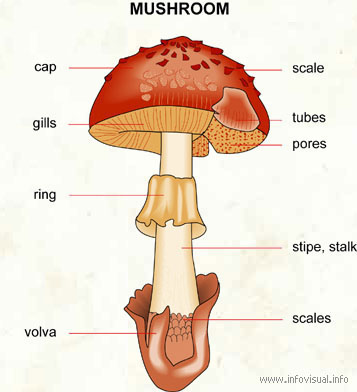

Official Data Set Link:
https://www.kaggle.com/uciml/mushroom-classification

Data Set Columns:  
  
Attribute Information: (classes: edible=e, poisonous=p)
  
* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s  
* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s  
* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y  
* bruises: bruises=t,no=f    
* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s  
* gill-attachment: attached=a,descending=d,free=f,notched=n  
* gill-spacing: close=c,crowded=w,distant=d  
* gill-size: broad=b,narrow=n  
* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y  
* stalk-shape: enlarging=e,tapering=t  
* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?  
* stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s  
* stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s  
* stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y  
* stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y  
* veil-type: partial=p,universal=u  
* veil-color: brown=n,orange=o,white=w,yellow=y  
* ring-number: none=n,one=o,two=t  
* ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z  
* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y  
* population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y  
* habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d  

Context  
Although this dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. Learn which features spell certain death and which are most palatable in this dataset of mushroom characteristics  
  
####Resources:
* https://medium.com/@alex.ortner.1982/top-10-binary-classification-algorithms-a-beginners-guide-feeacbd7a3e2  
* https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/  
* https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598  
* https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html  
* https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea  
* https://www.machinecurve.com/index.php/2020/05/05/how-to-create-a-confusion-matrix-with-scikit-learn/  
* https://medium.com/python-in-plain-english/how-to-do-eda-with-one-line-of-code-db9a853409d  

In [2]:
import pandas as pd
import seaborn as sns
import pandas_profiling
from sklearn.model_selection import train_test_split

In [2]:
# Ignore competability warnings
import warnings
warnings.filterwarnings('ignore')

# Option to show all the DataFrame columns
pd.options.display.max_columns = None

data = pd.read_csv("mushrooms.csv")
print(data.shape)

(8124, 23)


### Exploratory Data Analysis 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [6]:
data.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,o,c,l


In [7]:
# Check for missing values in each column 
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
# performing EDA using pandas-profiling
profile = pandas_profiling.ProfileReport(data)

profile

In [8]:
# Check the unique target values
data['class'].unique()

array(['p', 'e'], dtype=object)

In [41]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [45]:
# Check sample count per class type
group_class = data.groupby('class')['cap-shape'].count()
print(group_class)

class
e    4208
p    3916
Name: cap-shape, dtype: int64


<AxesSubplot:xlabel='class', ylabel='count'>

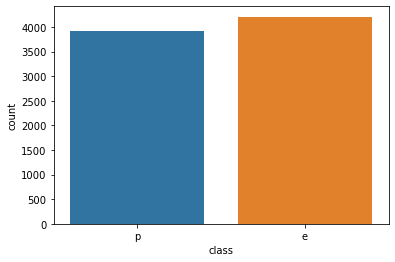

In [39]:
sns.countplot(data["class"])

In [33]:
# Not all relationships are symetrical, please read the following article
# https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598
# The Predictive Power Score PPS may give us a better understanding
# of the categorical columns and their relationships

# If you dont have the lib - pip install ppscore
import ppscore as pps

# Create a matrix with all the results
pps_matrix = pps.matrix(data)
pps_matrix

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000e+00,0.000000e+00,1.160554e-01,1.611613e-01,4.791250e-01,9.707623e-01,0.000000e+00,1.295581e-01,4.904501e-01,6.041390e-01,9.320783e-02,2.098021e-01,5.274868e-01,4.958989e-01,0.426082,4.074663e-01,0.000000e+00,0.000000,0.000000e+00,5.602399e-01,0.739372,4.463474e-01,3.540255e-01
cap-shape,0.000000e+00,1.000000e+00,0.000000e+00,5.509413e-02,0.000000e+00,3.476624e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.068771,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.020450,6.453186e-03,5.201497e-03
cap-surface,0.000000e+00,1.811773e-03,1.000000e+00,2.051615e-01,0.000000e+00,1.552309e-01,0.000000e+00,9.304453e-03,1.746104e-02,1.325039e-01,0.000000e+00,1.487036e-01,0.000000e+00,0.000000e+00,0.129468,1.174069e-01,0.000000e+00,0.000000,0.000000e+00,8.058919e-02,0.116962,8.830185e-02,8.942832e-02
cap-color,0.000000e+00,3.411803e-02,3.382085e-02,1.000000e+00,0.000000e+00,2.096319e-01,0.000000e+00,0.000000e+00,3.697251e-02,1.439554e-01,2.878667e-03,1.475234e-01,1.442657e-02,4.359687e-02,0.055538,6.677797e-02,0.000000e+00,0.000000,0.000000e+00,2.237261e-02,0.067890,1.133568e-01,1.005337e-01
bruises,4.840616e-01,0.000000e+00,0.000000e+00,9.532663e-02,1.000000e+00,5.387178e-01,0.000000e+00,0.000000e+00,2.168743e-01,5.517307e-01,0.000000e+00,4.871932e-01,4.528987e-01,4.569786e-01,0.144398,1.464941e-01,0.000000e+00,0.000000,0.000000e+00,7.544553e-01,0.598190,2.242526e-01,4.390185e-01
odor,4.075156e-01,0.000000e+00,0.000000e+00,1.663641e-01,1.590353e-01,1.000000e+00,0.000000e+00,0.000000e+00,1.054305e-01,2.932354e-01,1.592393e-01,6.668933e-02,2.979134e-01,3.377884e-01,0.267159,2.575952e-01,0.000000e+00,0.000000,0.000000e+00,3.137560e-01,0.338448,1.659671e-01,1.921486e-01
gill-attachment,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.744609e-02,1.000000e+00,0.000000e+00,0.000000e+00,7.019921e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.922163,9.221630e-01,0.000000e+00,0.937818,5.744609e-02,5.744609e-02,0.771062,0.000000e+00,0.000000e+00
gill-spacing,2.232028e-07,2.232028e-07,6.290731e-03,2.254455e-03,2.232028e-07,3.098249e-03,2.232028e-07,1.000000e+00,2.232028e-07,2.232028e-07,2.232028e-07,5.057600e-01,3.359184e-01,3.123201e-01,0.008375,2.232028e-07,2.232028e-07,0.008375,3.633546e-02,2.232028e-07,0.071062,3.879350e-01,2.232028e-07
gill-size,4.441454e-01,2.724207e-01,0.000000e+00,3.035336e-01,0.000000e+00,7.166913e-01,0.000000e+00,0.000000e+00,1.000000e+00,7.588582e-01,0.000000e+00,6.092903e-01,0.000000e+00,0.000000e+00,0.000000,1.195210e-03,0.000000e+00,0.004246,0.000000e+00,5.495554e-01,0.652435,3.962457e-01,4.295110e-01
gill-color,4.082435e-02,4.445877e-02,2.051044e-02,1.378161e-01,4.756018e-02,9.504854e-02,0.000000e+00,0.000000e+00,1.220226e-01,1.000000e+00,2.280624e-03,1.971142e-01,1.751883e-02,2.842728e-02,0.053649,4.824570e-02,0.000000e+00,0.000000,0.000000e+00,1.451347e-01,0.168654,1.257946e-01,1.054249e-01


In [34]:
# Slice the data frame as we are interested only in the class column:
df_class_ppx = pps_matrix['class']
df_class_ppx

class                       1.000000e+00
cap-shape                   0.000000e+00
cap-surface                 0.000000e+00
cap-color                   0.000000e+00
bruises                     4.840616e-01
odor                        4.075156e-01
gill-attachment             0.000000e+00
gill-spacing                2.232028e-07
gill-size                   4.441454e-01
gill-color                  4.082435e-02
stalk-shape                 0.000000e+00
stalk-root                  0.000000e+00
stalk-surface-above-ring    4.092593e-01
stalk-surface-below-ring    3.559794e-01
stalk-color-above-ring      1.057122e-07
stalk-color-below-ring      0.000000e+00
veil-type                   1.000000e+00
veil-color                  7.749480e-07
ring-number                 0.000000e+00
ring-type                   2.960125e-01
spore-print-color           8.515901e-02
population                  0.000000e+00
habitat                     0.000000e+00
Name: class, dtype: float64

In [36]:
# We are interested in only one column - class: pps.score(df, "feature_column", "target_column")
pps.score(data, 'odor', 'class')

{'x': 'odor',
 'y': 'class',
 'task': 'classification',
 'ppscore': 0.9707622818773931,
 'metric': 'weighted F1',
 'baseline_score': 0.514,
 'model_score': 0.9857904689924131,
 'model': DecisionTreeClassifier()}

In [37]:
pps.score(data, 'habitat', 'class')

{'x': 'habitat',
 'y': 'class',
 'task': 'classification',
 'ppscore': 0.3499142505367472,
 'metric': 'weighted F1',
 'baseline_score': 0.4972,
 'model_score': 0.6731368851698765,
 'model': DecisionTreeClassifier()}

### Data Encoding and Preparation

In [56]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [59]:
data.shape

(8124, 23)

In [58]:
# Encode all the categorical columns without the target class
df_encoded = pd.get_dummies(data=data, columns=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'])

In [60]:
df_encoded.shape

(8124, 118)

In [61]:
df_encoded.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,e,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,e,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,p,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,e,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [62]:
# Split the data into train and test data frames
X = df_encoded.drop(columns=['class']).copy()
y = df_encoded['class'].copy()
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.15)

(8124, 117)
(8124,)


In [63]:
X_train

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
6105,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
7073,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1439,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4749,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2434,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
7045,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7257,0,0,0,1,0,0,0,0,0,1

In [64]:
len(y_train)

6905

### Machine Learning and Evaluation

In [114]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

##### Naive Bayes

In [115]:
mnb = MultinomialNB().fit(X_train, y_train)

print("score on test: " + str(mnb.score(X_test, y_test)))
print("score on train: "+ str(mnb.score(X_train, y_train)))

score on test: 0.9433962264150944
score on train: 0.9546705286024619


<AxesSubplot:>

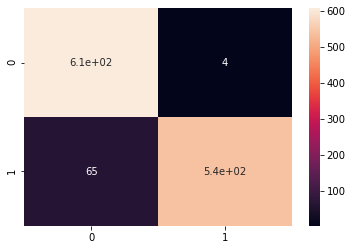

In [116]:
#Get the confusion matrix
y_pred = mnb.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

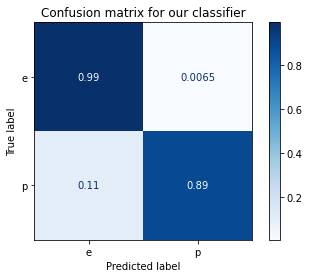

In [117]:
# Generate confusion matrix with labels
matrix = plot_confusion_matrix(mnb, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

##### Support Vector Machine SVM

In [118]:
svm=LinearSVC(C=0.0001)
svm.fit(X_train, y_train)

print("score on test: " + str(svm.score(X_test, y_test)))
print("score on train: "+ str(svm.score(X_train, y_train)))

score on test: 0.9220672682526662
score on train: 0.9267197682838523


<AxesSubplot:>

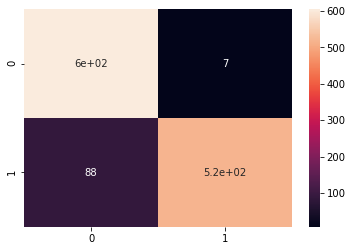

In [119]:
#Get the confusion matrix
y_pred = svm.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

##### Bagging Decision Tree

In [121]:
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K 
# n_estimators: number of decision trees 
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(X_train, y_train)
print("score on test: " + str(bg.score(X_test, y_test)))
print("score on train: "+ str(bg.score(X_train, y_train)))

score on test: 0.9991796554552912
score on train: 0.9998551774076756


<AxesSubplot:>

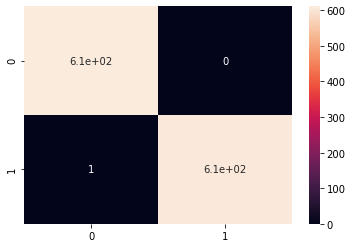

In [122]:
#Get the confusion matrix
y_pred = bg.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

### ML Tests - Algorithms overfitting the data

##### Logistic Regression = OVERFITTING!

In [123]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

print("score on test: " + str(lr.score(X_test, y_test)))
print("score on train: "+ str(lr.score(X_train, y_train)))

score on test: 1.0
score on train: 1.0


##### Decision Tree = OVERFITTING!

In [124]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print("score on test: "  + str(clf.score(X_test, y_test)))
print("score on train: " + str(clf.score(X_train, y_train)))

score on test: 1.0
score on train: 1.0


##### XGBoost  = OVERFITTING!

In [125]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [126]:
# fit model to training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

In [127]:
# make predictions for test data
y_pred = model.predict(X_test)

In [128]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


##### AdaBoost = OVERFITTING!

In [129]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb.fit(X_train, y_train)

print("score on test: " + str(adb.score(X_test, y_test)))
print("score on train: "+ str(adb.score(X_train, y_train)))

score on test: 1.0
score on train: 1.0


##### Random Forest = OVERFITTING!

In [130]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(X_train, y_train)
print("score on test: " + str(rf.score(X_test, y_test)))
print("score on train: "+ str(rf.score(X_train, y_train)))

score on test: 1.0
score on train: 1.0


### Final ML choice

In [110]:
from sklearn.ensemble import VotingClassifier
# 1) naive bias = mnb
# 2) logistic regression =lr
# 3) random forest =rf
# 4) support vector machine = svm
evc=VotingClassifier(estimators=[('mnb',mnb),('lr',lr),('rf',rf),('svm',svm)],voting='hard')
evc.fit(X_train, y_train)
print("score on test: " + str(evc.score(X_test, y_test)))
print("score on train: "+ str(evc.score(X_train, y_train)))

score on test: 0.9491386382280558
score on train: 0.9590152063721941


<AxesSubplot:>

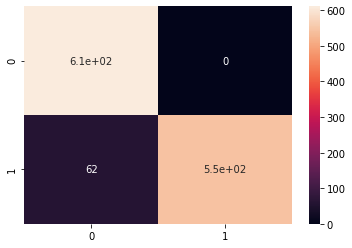

In [111]:
#Get the confusion matrix
y_pred = evc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

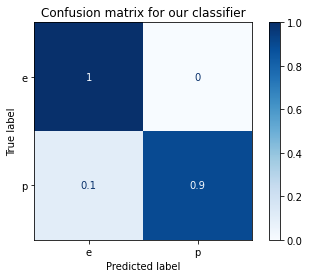

In [112]:
# Generate confusion matrix with labels
matrix = plot_confusion_matrix(evc, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

NOTE: Possible descrease of the False Negative predictions with NN

#### Test Env

In [3]:
# Naive Bayes
# Bagging Decision Tree
# Voting Classifier

# Fill in the mushroom data
test_data = {
        'cap-shape': ['b']        
    }
df_test = pd.DataFrame(test_data)
print(df_test)

  cap-shape
0         b


In [ ]:
df_test_encoded = pd.get_dummies(data=df_test, columns=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
           'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
           'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
           'stalk-surface-below-ring', 'stalk-color-above-ring',
           'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
           'ring-type', 'spore-print-color', 'population', 'habitat'])

In [ ]:
y_pred = svm.predict(df_test_encodedt)
print(y_pred)